## 1. Importing libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import Input
from keras.models import Sequential
from keras.models import Model
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from tensorflow.keras.utils import to_categorical  # Correct import for one-hot encoding
from tensorflow.keras.preprocessing.image import ImageDataGenerator  # Correct import for ImageDataGenerator
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [15]:
import keras
import tensorflow as tf
print(f"Keras version: {keras.__version__}")
print(f"TensorFlow version: {tf.__version__}")

Keras version: 3.7.0
TensorFlow version: 2.18.0


## 2. Loading and Pre-processing Weather Images

In [24]:
# Download the weather images and put them in a directory

path = r'C:\users\localadmin\Machine Learning 1\Multi-class Weather Dataset'
folders = os.listdir(path)
print(folders)

['Cloudy', 'Rain', 'Shine', 'Sunrise']


In [27]:
#this will load in the pictures and rescale them to 250x250pixels

datagenerator = ImageDataGenerator(rescale=1/255, validation_split=0.2)
train_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='training',
)

test_generator = datagenerator.flow_from_directory(
    path,
    target_size=(250 , 250),
    batch_size=32,
    subset='validation',
)

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


In [30]:
#this is a CNN to categorize the weather images

inputs = Input(shape=(250, 250, 3))

x = Conv2D(32, (5,5), activation = 'relu')(inputs)
x = MaxPooling2D(3,3)(x)
x = Conv2D(64, (5,5) , activation = 'relu')(x)
x = MaxPooling2D((3,3))(x)
x = Conv2D(128 , (5,5) , activation = 'relu')(x)
x = MaxPooling2D(3,3)(x)
x = Flatten()(x)
x = Dropout(0.5, seed = 5)(x)
x = Dense(128 , activation = 'relu')(x)

outputs = Dense(4, activation = 'softmax')(x)

model:Model = Model(inputs=inputs, outputs=outputs)

In [87]:
#compile and run the model
#how many epochs are required to generate an accurate model?

model.compile(optimizer="Adam", loss="mean_squared_error", metrics=["accuracy"])
model.fit(
    train_generator, 
    epochs = 55, #<----FILL THIS IN!
    steps_per_epoch = train_generator.n // train_generator.batch_size,
    validation_data = test_generator,
    validation_steps = test_generator.n // test_generator.batch_size,
)

Epoch 1/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 33s 1s/step - accuracy: 0.8954 - loss: 0.0412 - val_accuracy: 0.8036 - val_loss: 0.0801
Epoch 2/55
 1/28 ━━━━━━━━━━━━━━━━━━━━ 19s 737ms/step - accuracy: 0.9688 - loss: 0.0144

C:\Users\LocalAdmin\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9688 - loss: 0.0144 - val_accuracy: 0.8125 - val_loss: 0.0778
Epoch 3/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 955ms/step - accuracy: 0.9539 - loss: 0.0149 - val_accuracy: 0.7589 - val_loss: 0.1037
Epoch 4/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - accuracy: 0.9375 - loss: 0.0219 - val_accuracy: 0.7366 - val_loss: 0.1109
Epoch 5/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 982ms/step - accuracy: 0.9051 - loss: 0.0379 - val_accuracy: 0.8884 - val_loss: 0.0491
Epoch 6/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 5s 168ms/step - accuracy: 1.0000 - loss: 2.3517e-05 - val_accuracy: 0.8929 - val_loss: 0.0492
Epoch 7/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9140 - loss: 0.0368 - val_accuracy: 0.8839 - val_loss: 0.0541
Epoch 8/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 6s 183ms/step - accuracy: 1.0000 - loss: 6.4672e-04 - val_accuracy: 0.8795 - val_loss: 0.0546
Epoch 9/55
28/28 ━━━━━━━━━━━━━━━━━━━━ 27s 969ms/step - accuracy: 0.9662 - loss: 0.0140 - val_accuracy: 0.87

In [90]:
results = pd.DataFrame(model.history.history)

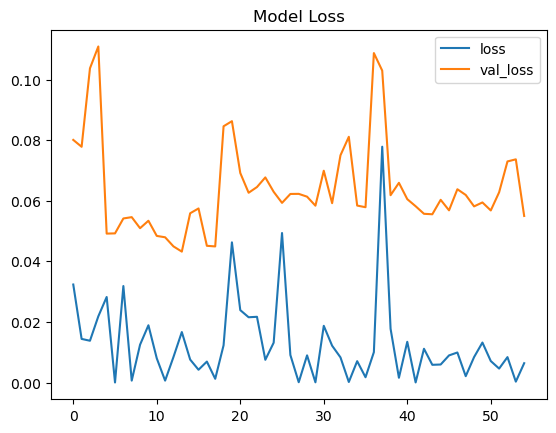

In [92]:
results[['loss','val_loss']].plot(title='Model Loss')
plt.savefig('./loss.png')

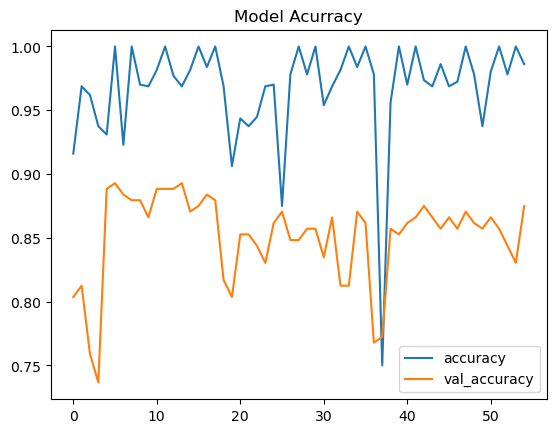

In [94]:
results[['accuracy','val_accuracy']].plot(title='Model Acurracy')
plt.savefig('./accuracy.png')

In [96]:
# Print the accuracy and loss
print("Accuracy: {}, Val_Accuracy: {}".format(results['accuracy'].iloc[-1], results['val_accuracy'].iloc[-1]))
print("Loss: {}, Val_Loss: {}".format(results['loss'].iloc[-1], results['val_loss'].iloc[-1]))

Accuracy: 0.9861910343170166, Val_Accuracy: 0.875
Loss: 0.0063853212632238865, Val_Loss: 0.05497043579816818


11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 128ms/step


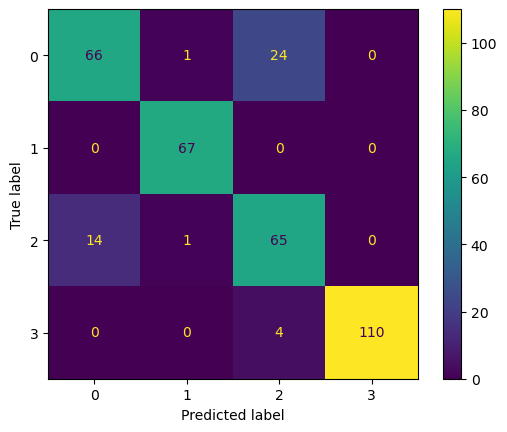

In [98]:
# collect n batches of images and display the confusion matrix for them.

class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
n = 10 #<--you can change the number of batches selected.

image_batch, classes_batch = next(test_generator)

for batch in range(n):
    temp = next(test_generator)
    image_batch = np.concatenate((image_batch, temp[0]))
    classes_batch = np.concatenate((classes_batch, temp[1]))

classes_batch = classes_batch
y_predict = model.predict(image_batch)

#Confusion matrix for training data
cm = confusion_matrix(y_pred = [np.argmax(x) for x in y_predict], y_true = [np.argmax(x) for x in classes_batch])
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [58]:
#This function will display a number of random images as well as the predictions for the type of weather.

def predict_one(model, num_images = None):  
    image_batch, classes_batch = next(test_generator)
    predicted_batch = model.predict(image_batch)
    for k in range(0,image_batch.shape[0] if num_images is None else num_images):
        image = image_batch[k]
        real_class = class_names[np.argmax(classes_batch[k])]
        predicted_class = class_names[np.argmax(predicted_batch[k])]
        value_predicted = predicted_batch[k]
        isTrue = (real_class == predicted_class)
        plt.figure(k)
        plt.title(str("Correct Prediction" if isTrue else "Incorrect Prediction") + ' - class: ' + real_class + ' - ' + 'predicted: ' + predicted_class + str(value_predicted))
        plt.axis('off')
        plt.savefig('./' + real_class + '_' + predicted_class + '_' + str(value_predicted) + '.png')
        plt.imshow(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step


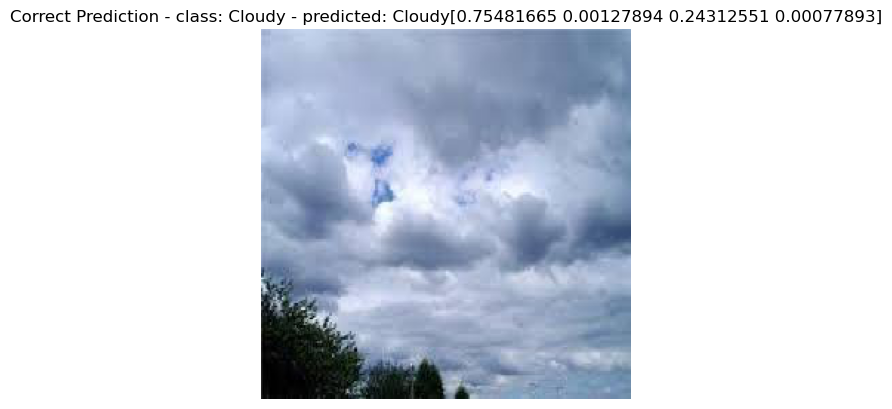

In [83]:
predict_one(model, 1) #<--you can show multiple pictures with this command. Just fill in the number you want to see.